# Projet Long : Julia VS Python VS R

#### Audrey Fortuné M2BI 

<div class="alert alert-block alert-success">
    Run cells in R 4.0.4
</div>

Nous allons mesurer le temps d'exécuter du programme.


In [26]:
########### ~~~~~~~~~~~~~~~~~~~~~###########
start_time <- Sys.time()
########### ~~~~~~~~~~~~~~~~~~~~~###########

.

## 1) Lire un fichier .pdb

Nous allons prendre comme fichier d'exemple, la structure disponible sur la Protein Data Bank '1RGB' qui est une phospholipase A2 de *Vipera ammodytes meridionali*.

Nous utilisons le module 'bio3d'.

In [27]:
# import des packages

install.packages("bio3d", dependencies = TRUE)
library(bio3d)


The downloaded binary packages are in
	/var/folders/g5/n3zk3f3554xccc2gvf5jp63r0000gn/T//Rtmppq1hG7/downloaded_packages


In [28]:
# Read a PDB file from the RCSB online database
prot_file <- read.pdb("1RGB", verbose = FALSE) 

# Protein Structure
prot_file

  Note: Accessing on-line PDB file


Warning message in get.pdb(file, path = tempdir(), verbose = FALSE):
“/var/folders/g5/n3zk3f3554xccc2gvf5jp63r0000gn/T//Rtmppq1hG7/1RGB.pdb  exists. Skipping download”



 Call:  read.pdb(file = "1RGB", verbose = FALSE)

   Total Models#: 1
     Total Atoms#: 3892,  XYZs#: 11676  Chains#: 4  (values: A B K L)

     Protein Atoms#: 3852  (residues/Calpha atoms#: 488)
     Nucleic acid Atoms#: 0  (residues/phosphate atoms#: 0)

     Non-protein/nucleic Atoms#: 40  (residues: 2)
     Non-protein/nucleic resid values: [ ELD (2) ]

   Protein sequence:
      NLFQFAKMINGKLGAFSVWNYISYGCYCGWGGQGTPKDATDRCCFVHDCCYGRVRGCNPK
      LAIYSYSFKKGNIVCGKNNGCLRDICECDRVAANCFHQNKNTYNKNYKFLSSSRCRQTSE
      QCNLFQFAKMINGKLGAFSVWNYISYGCYCGWGGQGTPKDATDRCCFVHDCCYGRVRGCN
      PKLAIYSYSFKKGNIVCGKNNGCLRDICECDRVAANCFHQNKNTY...<cut>...SEQC

+ attr: atom, xyz, seqres, helix, sheet,
        calpha, remark, call

Protein Structure 1gh4.pdb with 1 models, 1 chains A , 123 residues, 1089 atoms

> Affichons les coordonnées des carbones α (notés CA) des 10 premiers résidus:

In [29]:
# Sélection que des Carbones alphas
ca <- atom.select(prot_file, elety = "CA")
chain <- prot_file$atom[ca$atom, c("resno","resid","x","y","z")]
for (v in 1:10) {
    cat("Residue", chain$resno[v], "with name", chain$resid[v], "coordinates [", chain$x[v], chain$y[v], chain$z[v], "] \n")
}

Residue 1 with name ASN coordinates [ 4.682 55.345 28.346 ] 
Residue 2 with name LEU coordinates [ 5.148 56.953 25.006 ] 
Residue 3 with name PHE coordinates [ 4.657 53.617 23.371 ] 
Residue 4 with name GLN coordinates [ 1.52 52.812 25.326 ] 
Residue 5 with name PHE coordinates [ 0.559 56.349 24.578 ] 
Residue 6 with name ALA coordinates [ 1.554 56.075 20.967 ] 
Residue 7 with name LYS coordinates [ -0.772 53.147 20.427 ] 
Residue 8 with name MET coordinates [ -3.666 55.052 21.963 ] 
Residue 9 with name ILE coordinates [ -3.329 57.765 19.393 ] 
Residue 10 with name ASN coordinates [ -3.162 55.165 16.617 ] 


.

## 2) Visualisation de la structure

### * 2D

In [30]:
# structure secondaire (hélice, brin, turn)
sse <- print.sse(prot_file)


Call:
  read.pdb(file = "1RGB", verbose = FALSE)

Class:
  pdbsse

Helices:  24 
         1-13 (A)      18-22 (A)      40-55 (A)     90-108 (A)    114-118 (A)
         2-12 (B)      18-23 (B)      39-55 (B)      77-81 (B)     90-108 (B)
      109-113 (B)    114-118 (B)    121-127 (B)       1-13 (K)      17-22 (K)
        39-55 (K)     90-109 (K)    121-127 (K)       1-14 (L)      17-22 (L)
        39-55 (L)     90-109 (L)    114-118 (L)    121-127 (L)

Sheets:   6 
        76-78 (A)      81-83 (A)      75-76 (B)      83-84 (B)      75-77 (K)
        82-84 (K)

Turns:   0 

Output is provided in residue numbers



Nous pouvons voir que la protéine possède des structures secondaires en hélices au nombre de 24, et en feuillets au nombre de 6, mais 0 turn. Les numéros des résidus sont indiqués. 

Warning message in nma.pdb(prot_file):
“Possible multi-chain structure or missing in-structure residue(s) present
  Fluctuations at neighboring positions may be affected.”


 Building Hessian...		Done in 0.121 seconds.
 Diagonalizing Hessian...	Done in 4.143 seconds.


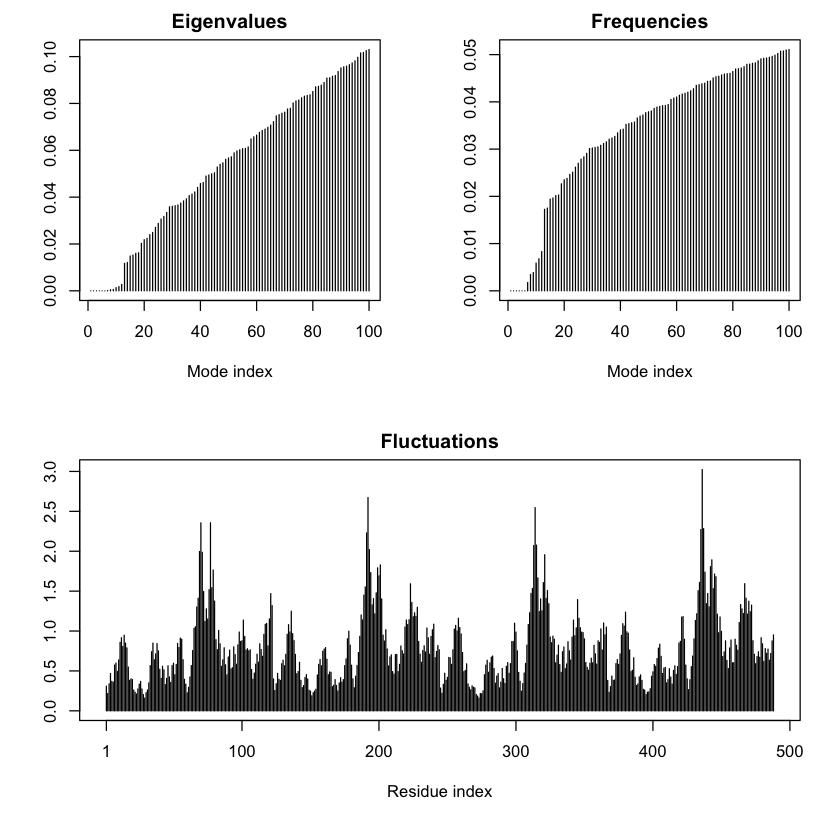

In [31]:
# a normal mode analysis (NMA) on our structure 
modes <- nma(prot_file) 
plot(modes)

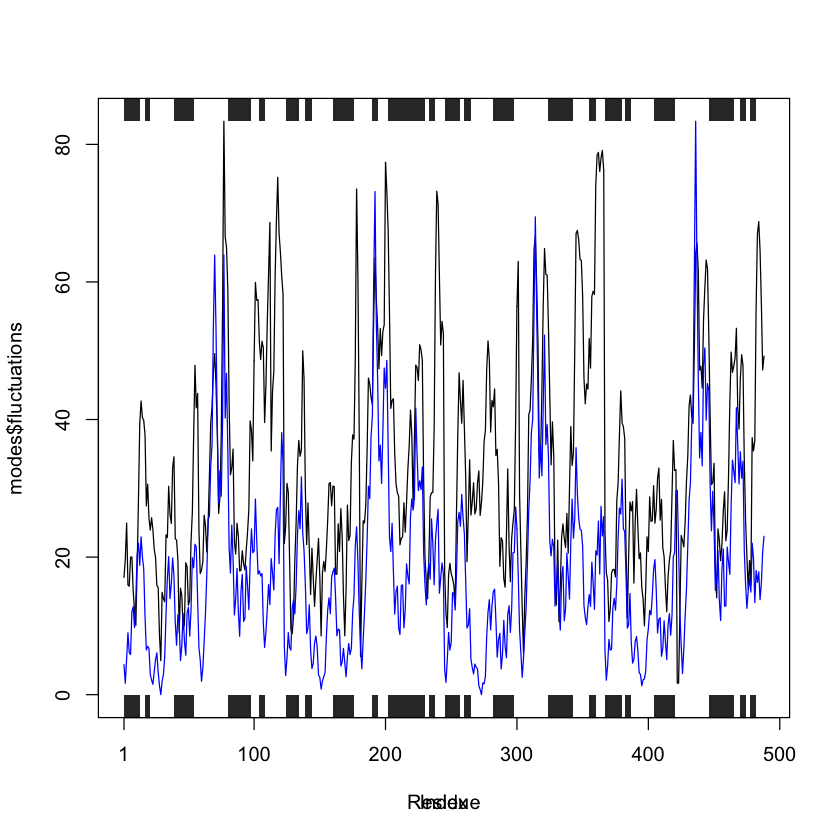

In [32]:
# Select Calpha atoms
inds <- atom.select(prot_file, "calpha")
plot.bio3d(prot_file$atom$b[inds$atom], sse = prot_file, typ = "l")

# Plot B-factors with NMA derived fluctuations
par(new = TRUE)
plot(modes$fluctuations, axes = FALSE, typ = "l", col = "blue")

### * 3D

Le package "bio3d.view" pour la visualisation 3D interactive est toujours en développement. [link](http://thegrantlab.org/bio3d/articles/online/intro_vignette/Bio3D_introduction.html)

Mais nous pouvons supposer que les commandes seront les suivantes....

In [33]:
#install.packages("bio3d.view")
#library(bio3d.view) 

In [34]:
#view.pdb(prot_file)

.

## 3) Carte de contact

In [35]:
contacts <- dm(prot_file, inds = "calpha") 
# la fonction dm permet de construire une matrice de distance pour une structure protéique donnée.

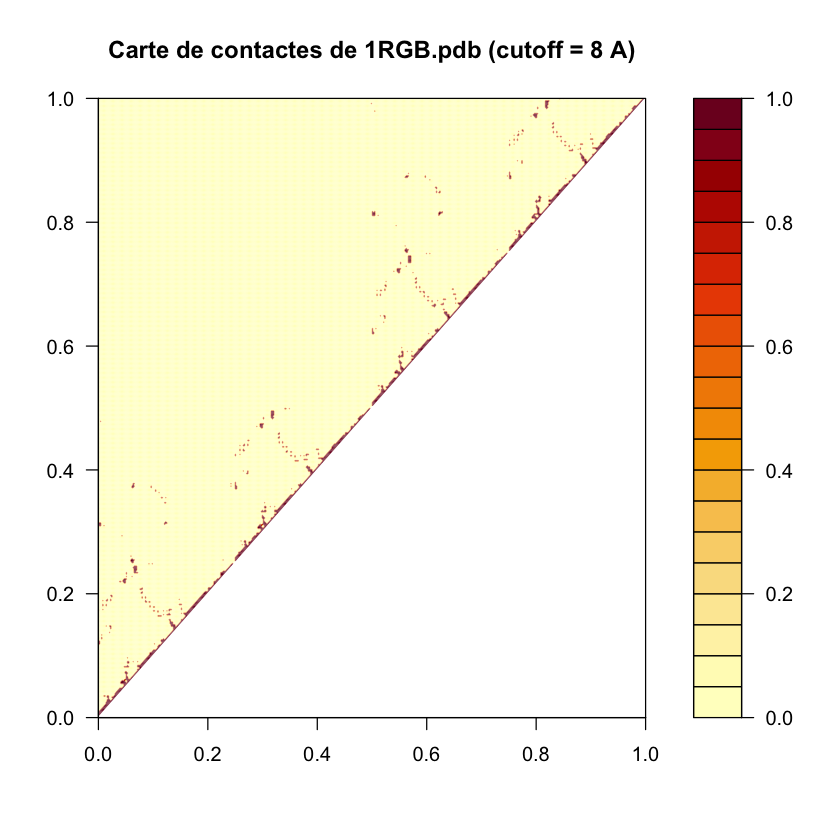

In [36]:
cutoff = 8.0 # On choisi un cutoff < 8 Angström

filled.contour(contacts < cutoff, plot.title = title(main = "Carte de contactes de 1RGB.pdb (cutoff = 8 A)"), fontsize = 16, fontweight = "bold")

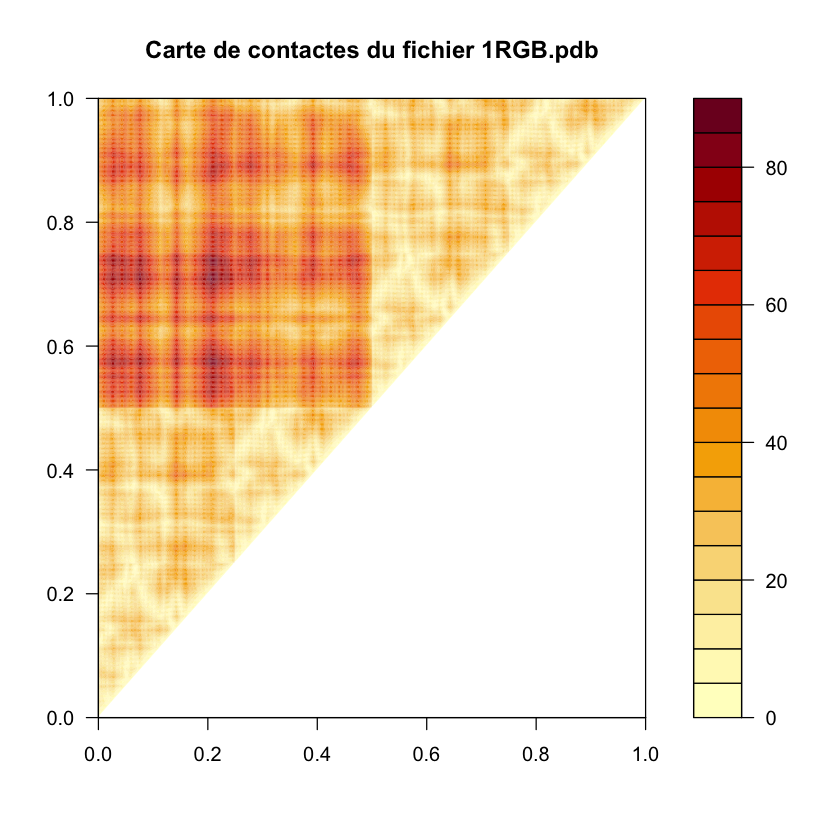

In [37]:
filled.contour(contacts, plot.title = title(main = "Carte de contactes du fichier 1RGB.pdb"), fontsize = 16, fontweight = "bold")

.

## 4) Comparer 2 séquences

Nous allons prendre comme exemple ici deux fichiers issues de la Protein Data Bank : 6HQ1 et 1UHM qui sont respectivement des domaines globulaires de l'histone H1 humaine, et de l'homologue d'histone de liaison Hho1p de *S. cerevisiae*. 

In [38]:
# Protein Sequence

seq_prot <- function(file_name){
    # Reading a pdb file and extracting protein sequence
    text <- aa321(file_name$seqres) # pour changer le code à 3 lettres en code à 1 lettre
    text <- data.frame(text)
    for (aa in text){
        tmp <- paste0(aa, collapse = "")
    }
    return(tmp)
}

In [39]:
# domaine globulaire de l'histone humaine H1.0

struc1 <- read.pdb("6HQ1", verbose = FALSE)
seq1 <- seq_prot(struc1)
cat("La séquence protéique du fichier 6HQ1.pdb est :",seq1)

  Note: Accessing on-line PDB file


Warning message in get.pdb(file, path = tempdir(), verbose = FALSE):
“/var/folders/g5/n3zk3f3554xccc2gvf5jp63r0000gn/T//Rtmppq1hG7/6HQ1.pdb  exists. Skipping download”


La séquence protéique du fichier 6HQ1.pdb est : GDHPKYSDMIVAAIQAEKNRAGSSRQSIQKYIKSHYKVGENADSQIKLSIKRLVTTGVLKQTKGVGASGSFRLAK

In [40]:
# domaine globulaire de l'homologue d'histone de liaison Hho1p de S. cerevisiae

struc2 <- read.pdb("1UHM", verbose = FALSE)
seq2 <- seq_prot(struc2)
cat("La séquence protéique du fichier 1UHM.pdb est :", seq2)

  Note: Accessing on-line PDB file


Warning message in get.pdb(file, path = tempdir(), verbose = FALSE):
“/var/folders/g5/n3zk3f3554xccc2gvf5jp63r0000gn/T//Rtmppq1hG7/1UHM.pdb  exists. Skipping download”


La séquence protéique du fichier 1UHM.pdb est : EASSKSYRELIIEGLTALKERKGSSRPALKKFIKENYPIVGSASNFDLYFNNAIKKGVEAGDFEQPKGPAGAVKLAKK

### * Matrice de score Blosum62

In [41]:
# import des packages

library(Biostrings) # nécessaire pour avoir la data BLOSUM62

In [42]:
# Chargement du jeu de données
data(BLOSUM62)

matrice_blosum = BLOSUM62
print(matrice_blosum)

   A  R  N  D  C  Q  E  G  H  I  L  K  M  F  P  S  T  W  Y  V  B  J  Z  X  *
A  4 -1 -2 -2  0 -1 -1  0 -2 -1 -1 -1 -1 -2 -1  1  0 -3 -2  0 -2 -1 -1 -1 -4
R -1  5  0 -2 -3  1  0 -2  0 -3 -2  2 -1 -3 -2 -1 -1 -3 -2 -3 -1 -2  0 -1 -4
N -2  0  6  1 -3  0  0  0  1 -3 -3  0 -2 -3 -2  1  0 -4 -2 -3  4 -3  0 -1 -4
D -2 -2  1  6 -3  0  2 -1 -1 -3 -4 -1 -3 -3 -1  0 -1 -4 -3 -3  4 -3  1 -1 -4
C  0 -3 -3 -3  9 -3 -4 -3 -3 -1 -1 -3 -1 -2 -3 -1 -1 -2 -2 -1 -3 -1 -3 -1 -4
Q -1  1  0  0 -3  5  2 -2  0 -3 -2  1  0 -3 -1  0 -1 -2 -1 -2  0 -2  4 -1 -4
E -1  0  0  2 -4  2  5 -2  0 -3 -3  1 -2 -3 -1  0 -1 -3 -2 -2  1 -3  4 -1 -4
G  0 -2  0 -1 -3 -2 -2  6 -2 -4 -4 -2 -3 -3 -2  0 -2 -2 -3 -3 -1 -4 -2 -1 -4
H -2  0  1 -1 -3  0  0 -2  8 -3 -3 -1 -2 -1 -2 -1 -2 -2  2 -3  0 -3  0 -1 -4
I -1 -3 -3 -3 -1 -3 -3 -4 -3  4  2 -3  1  0 -3 -2 -1 -3 -1  3 -3  3 -3 -1 -4
L -1 -2 -3 -4 -1 -2 -3 -4 -3  2  4 -2  2  0 -3 -2 -1 -2 -1  1 -4  3 -3 -1 -4
K -1  2  0 -1 -3  1  1 -2 -1 -3 -2  5 -1 -3 -1  0 -1 -3 -2 -2  0 -3  1 -1 -4

### * Alignement global

In [43]:
alignments_global <- pairwiseAlignment(seq1, seq2, type = "global", substitutionMatrix = "BLOSUM62", gapOpening = -10,
gapExtension = -1, scoreOnly = FALSE)
print(alignments_global)

Global PairwiseAlignmentsSingleSubject (1 of 1)
pattern: GDHPK-YSDMIVAAIQAEKNRAGSSRQSIQKYIK...DSQIKLSIKRLVTTGVLKQTKGVGASGSFRLAK-
subject: EASSKSYRELIIEGLTALKERKGSSRPALKKFIK...DLYFNNAIKKGVEAGDFEQPKG--PAGAVKLAKK
score: 83 


### * Alignement local

In [44]:
alignments_local <- pairwiseAlignment(seq1, seq2, type = "local", substitutionMatrix = "BLOSUM62", gapOpening = -10,
gapExtension = -1, scoreOnly = FALSE)
print(alignments_local)

Local PairwiseAlignmentsSingleSubject (1 of 1)
pattern: [5] KYSDMIVAAIQAEKNRAGSSRQSIQKYIKSHY...SQIKLSIKRLVTTGVLKQTKGVGASGSFRLAK
subject: [6] SYRELIIEGLTALKERKGSSRPALKKFIKENY...LYFNNAIKKGVEAGDFEQPKG--PAGAVKLAK
score: 106 


### * RMSD (Root Mean Square Deviation)

In [45]:
# RMSD between structure 1 and structure 2

inds <- atom.select(struc1, "calpha")

r <- rmsd(struc1, struc2, a.inds=inds$f.inds, b.inds=inds$f.inds, fit = TRUE)
cat("Le rmsd de l'alignement des structures '6HQ1' et '1UHM' est de :", r)

Le rmsd de l'alignement des structures '6HQ1' et '1UHM' est de : 9.146

.

In [46]:
########### ~~~~~~~~~~~~~~~~~~~~~###########
end_time <- Sys.time()
cat ("Le temps d'exécution du programme R est de", difftime(end_time, start_time))
########### ~~~~~~~~~~~~~~~~~~~~~###########

Le temps d'exécution du programme R est de 18.028

.

## Tester la limite

Nous allons tester la limite du langage à l'aide d'une structure protéique 6PNJ composé de 6708 residus.

In [53]:
########### ~~~~~~~~~~~~~~~~~~~~~###########
start_time <- Sys.time()
########### ~~~~~~~~~~~~~~~~~~~~~###########

In [54]:
boundary <- read.pdb("6PNJ", verbose = FALSE) 

  Note: Accessing on-line PDB file


Warning message in get.pdb(file, path = tempdir(), verbose = FALSE):
“/var/folders/g5/n3zk3f3554xccc2gvf5jp63r0000gn/T//Rtmppq1hG7/6PNJ.pdb  exists. Skipping download”


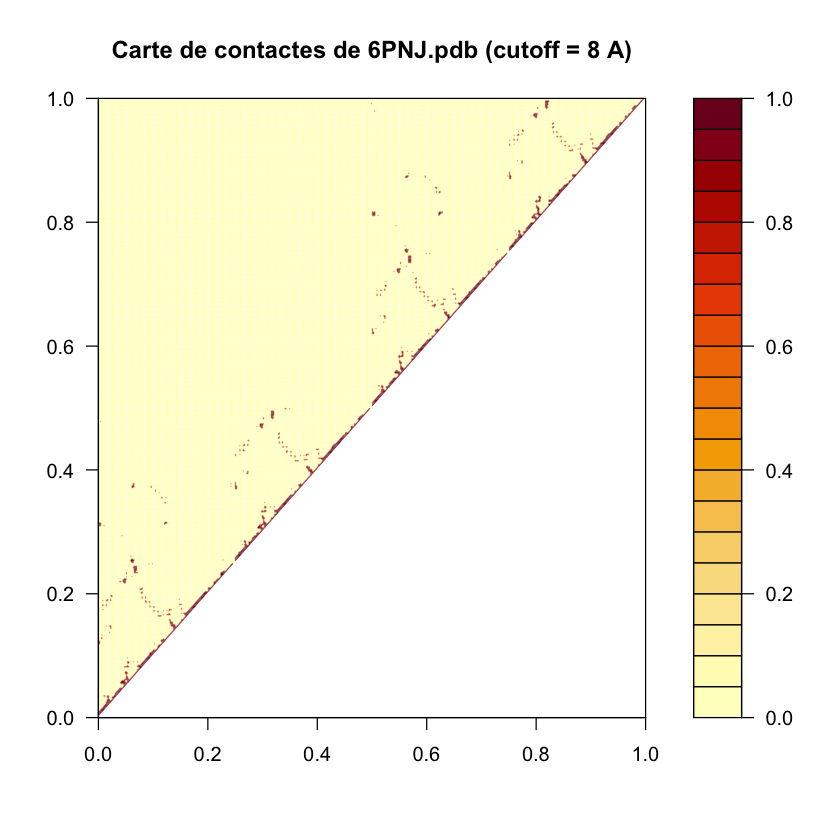

In [55]:
contacts <- dm(prot_file, inds = "calpha") 

cutoff = 8.0 # On choisi un cutoff < 8 Angström
filled.contour(contacts < cutoff, plot.title = title(main = "Carte de contactes de 6PNJ.pdb (cutoff = 8 A)"), fontsize = 16, fontweight = "bold")

In [56]:
########### ~~~~~~~~~~~~~~~~~~~~~###########
end_time <- Sys.time()
cat ("Le temps d'exécution du 'test limite' en R est de", difftime(end_time, start_time))
########### ~~~~~~~~~~~~~~~~~~~~~###########

Le temps d'exécution du 'test limite' en R est de 6.737273